In [8]:
# Imports the method used to connect to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float

from config import db_password
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
db_user = 'postgres'

db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "employees_db"
engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [10]:
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [11]:
emp_salaries_df = \
pd.read_sql_query("SELECT t.emp_no, t.title, s.salary, t.from_date, t.to_date " + \
                  "FROM titles t INNER JOIN salaries s ON t.emp_no = s.emp_no",con=engine)


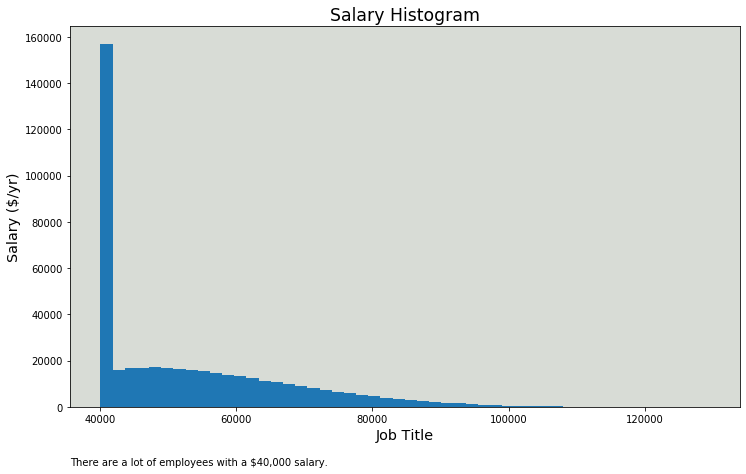

In [18]:
plt.figure(figsize = (12,7))
ax = plt.axes()
ax.set_facecolor("xkcd:light grey")

plt.hist(emp_salaries_df["salary"], bins=50)

plt.xlabel("Job Title", size = "x-large")
plt.ylabel("Salary ($/yr)", size = "x-large")
plt.title("Salary Histogram", size = "xx-large")
plt.annotate('There are a lot of employees with a $40,000 salary.', 
             (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(os.path.join("..","Images","Employee Salary Histogram.png"), bbox_inches="tight")

In [52]:
avg_salaries = emp_salaries_df.groupby("title").mean()["salary"]
avg_salaries

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

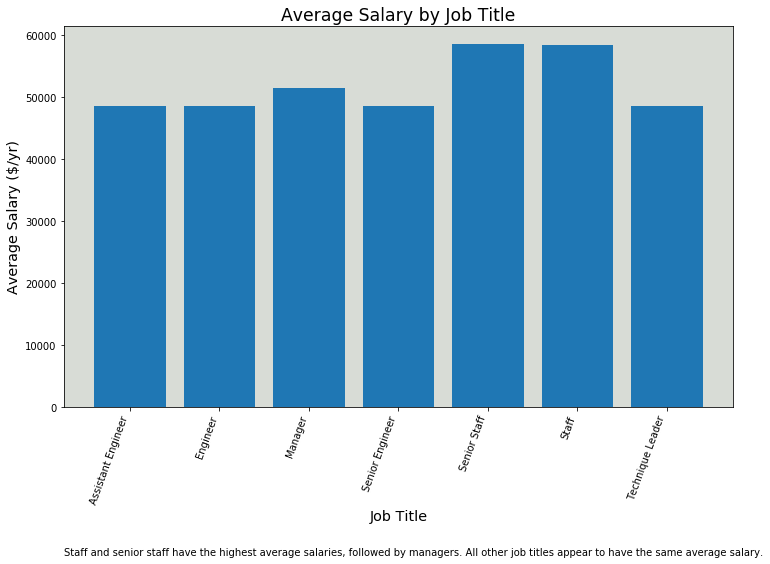

In [19]:
avg_salaries = emp_salaries_df.groupby("title").mean()["salary"]
x_axis = range(len(avg_salaries))

plt.figure(figsize = (12,7))
ax = plt.axes()
ax.set_facecolor("xkcd:light grey")

plt.bar(x_axis, avg_salaries.values, align="center")

plt.xticks(x_axis, avg_salaries.index, rotation=70, ha="right")
plt.xlabel("Job Title", size = "x-large")
plt.ylabel("Average Salary ($/yr)", size = "x-large")
plt.title("Average Salary by Job Title", size = "xx-large")
plt.annotate("Staff and senior staff have the highest average salaries, followed by managers. All " + \
"other job titles appear to have the same average salary.", (0,0), (0, -140), xycoords='axes fraction', 
             textcoords='offset points', va='top')
plt.savefig(os.path.join("..","Images","Average Salary by Job Title.png"), bbox_inches="tight")